# Different traning times
This notebook is to study the effect of different trainint times on a seqence

In [112]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=3)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities, calculate_angle_from_history
from connectivity_functions import artificial_connectivity_matrix

## An example

epochs 0
epochs 1
epochs 2
[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


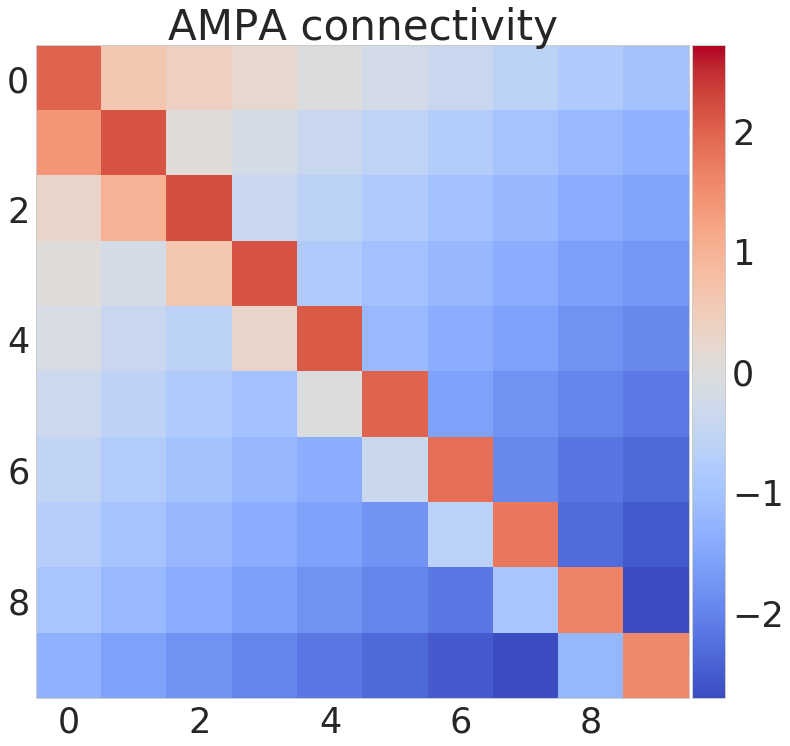

In [122]:
always_learning = False
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.050
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre_ampa', 'w_ampa', 'p_pre']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = 0.0
epochs = 3

# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                  tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=False,
                  diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                  always_learning=always_learning)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
training_time = np.linspace(0.100, 1.00, num=n_patterns)

# training_time = np.random.normal(loc=0.500, scale=0.010, size=n_patterns)
# training_time = 0.100
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

print(training_time)
plot_weight_matrix(manager.nn, ampa=True)

[[-100.       0.632    0.397    0.192   -0.006   -0.203   -0.401   -0.603
    -0.82    -0.974]
 [   1.392 -100.       0.044   -0.173   -0.37    -0.564   -0.759   -0.958
    -1.172   -1.296]
 [   0.287    1.002 -100.      -0.401   -0.612   -0.805   -0.999   -1.197
    -1.409   -1.524]
 [   0.059   -0.19     0.624 -100.      -0.796   -1.005   -1.198   -1.394
    -1.605   -1.726]
 [  -0.135   -0.388   -0.609    0.281 -100.      -1.178   -1.388   -1.583
    -1.792   -1.929]
 [  -0.326   -0.58    -0.801   -1.001   -0.038 -100.      -1.555   -1.768
    -1.975   -2.129]
 [  -0.518   -0.773   -0.993   -1.192   -1.384   -0.341 -100.      -1.931
    -2.158   -2.325]
 [  -0.714   -0.969   -1.19    -1.388   -1.578   -1.765   -0.633 -100.
    -2.318   -2.521]
 [  -0.923   -1.18    -1.4     -1.596   -1.785   -1.969   -2.153   -0.919
  -100.      -2.705]
 [  -1.301   -1.566   -1.783   -1.973   -2.153   -2.327   -2.499   -2.672
    -1.207 -100.   ]]
[1 2 3 4 0 0 0 0 0 0]


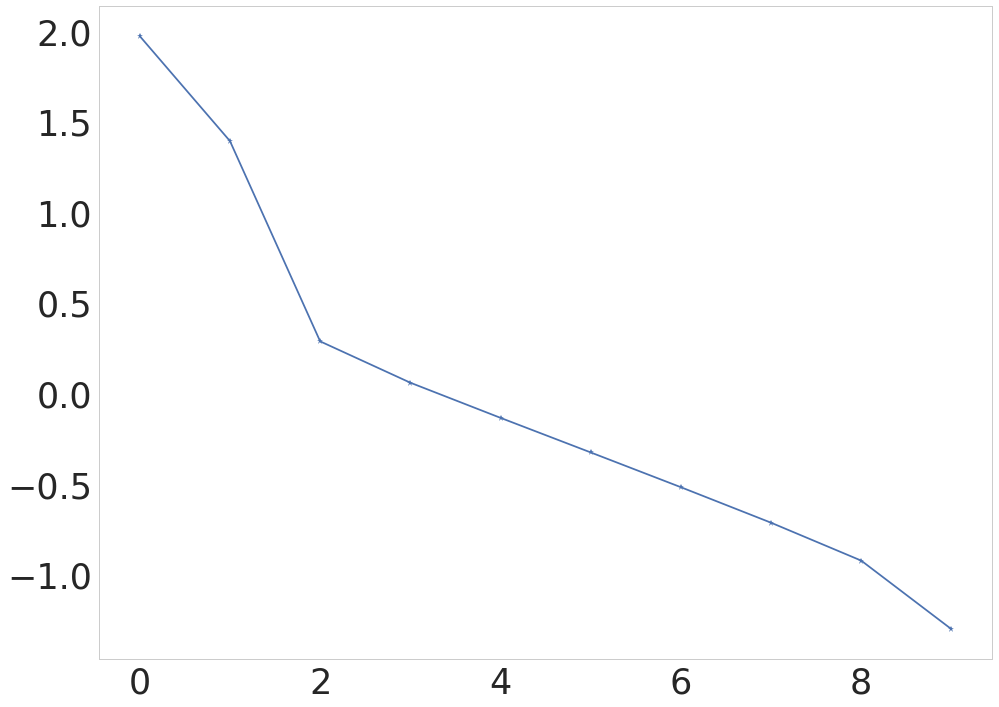

In [123]:
w_aux = np.copy(nn.w_ampa)
np.fill_diagonal(w_aux, -100)
print(w_aux)
print(w_aux.argmax(axis=0))
plt.plot(nn.w_ampa[:, 0], '*-')

In [124]:
print(nn.p_pre_ampa)
print(nn.p_post_ampa)
print(nn.p_co_ampa)

[ 0.036  0.047  0.059  0.071  0.084  0.099  0.117  0.138  0.163  0.185]
[ 0.036  0.047  0.059  0.071  0.084  0.099  0.117  0.137  0.162  0.189]
[[ 0.009  0.003  0.003  0.003  0.003  0.003  0.003  0.003  0.003  0.003]
 [ 0.007  0.019  0.003  0.003  0.003  0.003  0.003  0.003  0.002  0.002]
 [ 0.003  0.008  0.031  0.003  0.003  0.003  0.003  0.002  0.002  0.002]
 [ 0.003  0.003  0.008  0.043  0.003  0.003  0.002  0.002  0.002  0.002]
 [ 0.003  0.003  0.003  0.008  0.056  0.003  0.002  0.002  0.002  0.002]
 [ 0.003  0.003  0.003  0.003  0.008  0.071  0.002  0.002  0.002  0.002]
 [ 0.003  0.003  0.003  0.003  0.002  0.008  0.089  0.002  0.002  0.002]
 [ 0.002  0.002  0.002  0.002  0.002  0.002  0.009  0.11   0.002  0.002]
 [ 0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.009  0.135  0.002]
 [ 0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.009  0.165]]


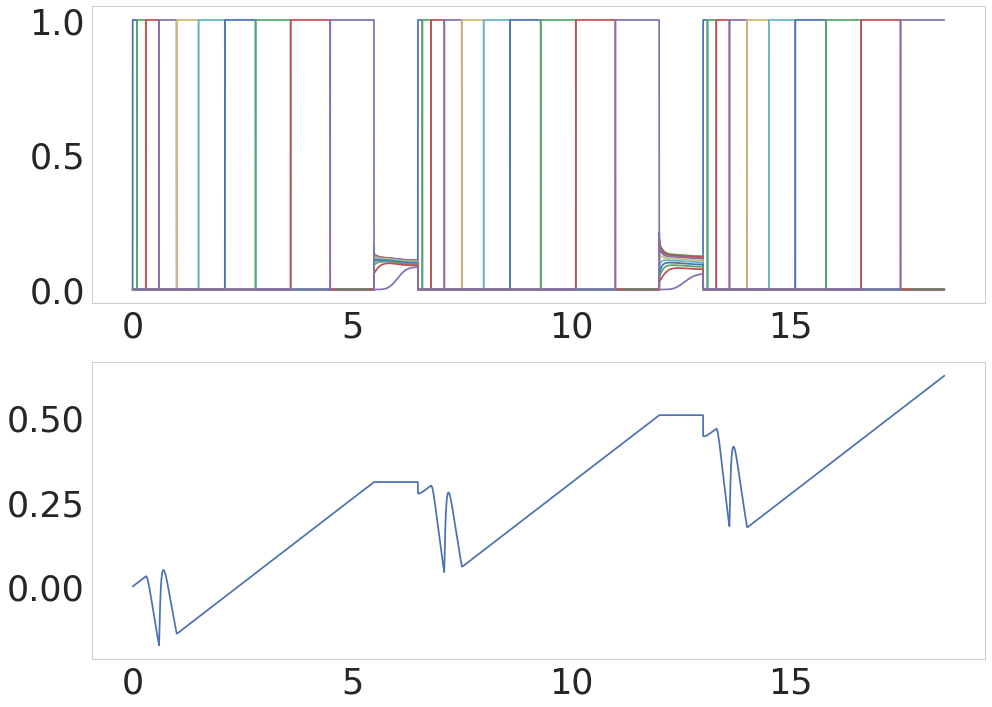

In [125]:
o = manager.history['o']
w = manager.history['w_ampa']
training_time = np.linspace(0, manager.T_total, num=o.shape[0])
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(211)
for pattern in patterns_indexes:
    ax1.plot(training_time, o[:, pattern])
    
ax2 = fig.add_subplot(212)
ax2.plot(training_time, w[:, 3, 2])


success 0.0


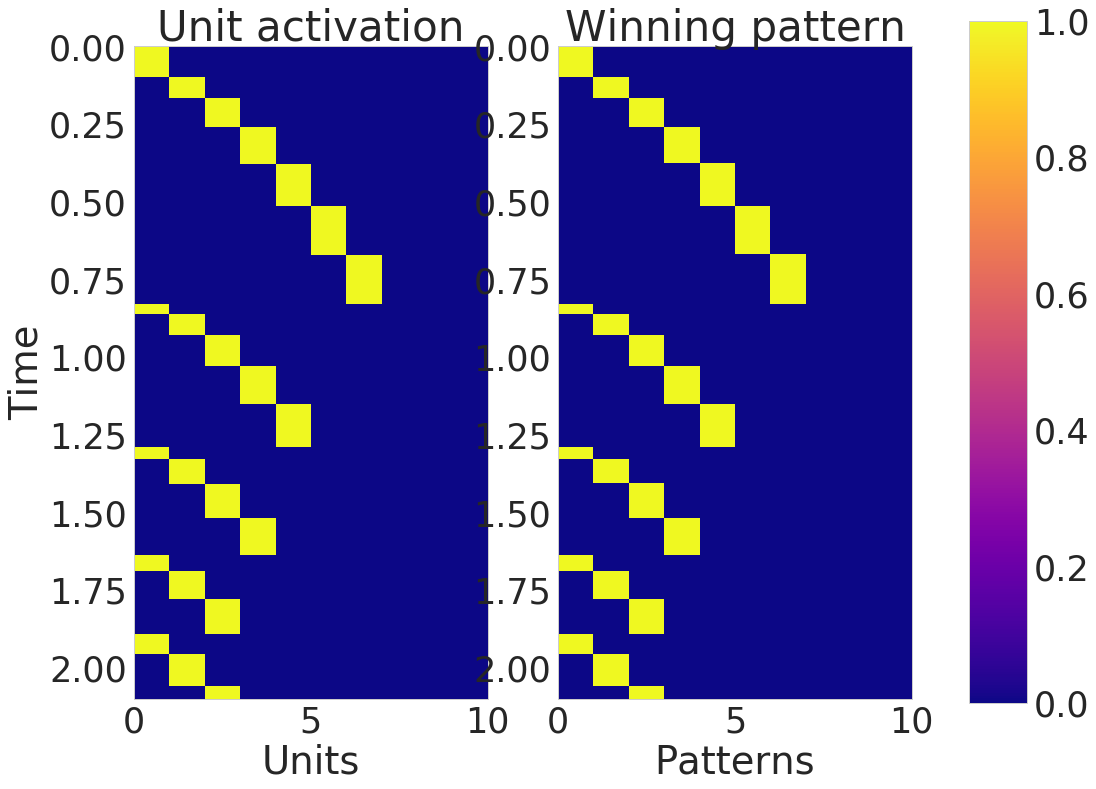

In [126]:
nn.strict_maximum = True
T_recall = 2.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

## Characterise the gaussian distribution

In [80]:
always_learning = True
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.020
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = 0.0
epochs = 3

# Recall
T_recall = 2.0
T_cue = 0.100
I_cue = 0.0
n = 1

loc = 0.500
num = 10
scale_vector = np.linspace(0.010, 0.100, num=num)
success_vector_scale = np.zeros(num)
persistence_time_vector_scale = np.zeros(num)

for index, scale in enumerate(scale_vector):
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=False,
                      diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    training_time = np.random.normal(loc=loc, scale=scale, size=n_patterns)
    training_time[training_time  <= 0.010] = 0.010
    print(training_time)
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)

    nn.strict_maximum = True
    sequences = [patterns_indexes]


    aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
    total_sequence_time, mean, std, success, timings = aux

    success_vector_scale[index] = success
    persistence_time_vector_scale[index] = mean

[ 0.497  0.492  0.498  0.504  0.525  0.507  0.471  0.492  0.502  0.493]
[ 0.501  0.509  0.464  0.485  0.495  0.516  0.501  0.504  0.485  0.515]
[ 0.48   0.446  0.528  0.509  0.508  0.477  0.518  0.495  0.506  0.521]
[ 0.522  0.433  0.537  0.563  0.574  0.511  0.489  0.45   0.486  0.463]
[ 0.467  0.452  0.468  0.494  0.459  0.516  0.544  0.472  0.553  0.499]
[ 0.587  0.491  0.48   0.507  0.476  0.433  0.558  0.388  0.51   0.467]
[ 0.537  0.481  0.505  0.441  0.468  0.527  0.506  0.529  0.528  0.506]
[ 0.439  0.569  0.577  0.498  0.603  0.422  0.503  0.366  0.643  0.441]
[ 0.51   0.502  0.46   0.513  0.529  0.524  0.309  0.475  0.364  0.289]
[ 0.518  0.404  0.432  0.716  0.463  0.461  0.554  0.461  0.592  0.39 ]


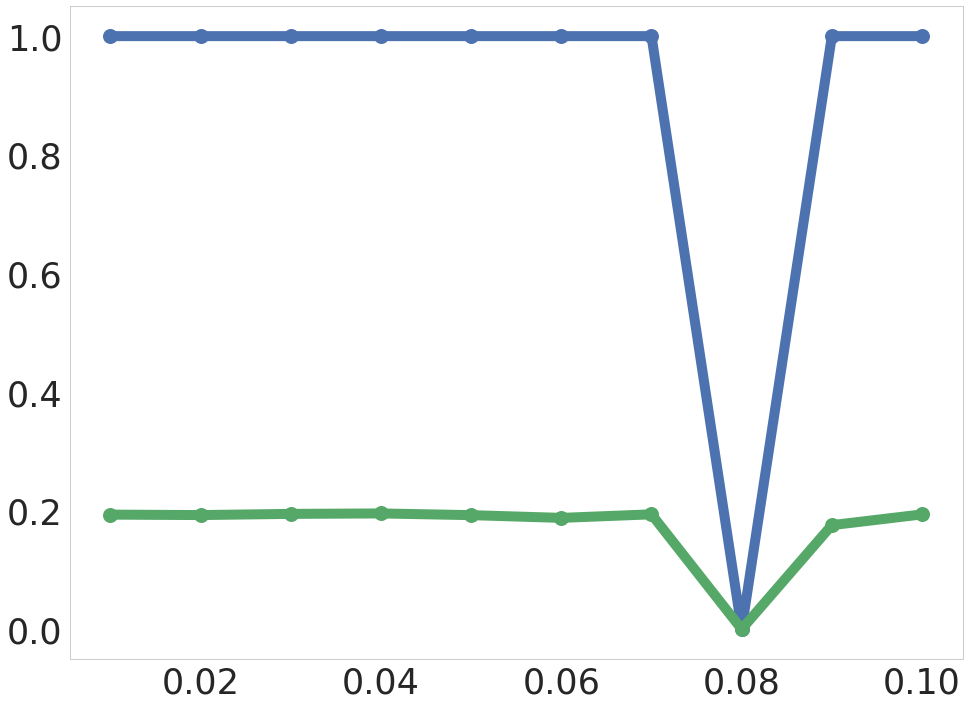

In [81]:
markersize = 15
linewidth = 10

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(scale_vector, success_vector_scale / 100.0, 'o-', markersize=markersize, linewidth=linewidth)
ax.plot(scale_vector, persistence_time_vector_scale, 'o-', markersize=markersize, linewidth=linewidth)

In [79]:
scale_vector

array([ 0.1  ,  0.122,  0.144,  0.167,  0.189,  0.211,  0.233,  0.256,
        0.278,  0.3  ])

#### With means

In [91]:
always_learning = True
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.020
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = 0.0
epochs = 3

# Recall
T_recall = 2.0
T_cue = 0.100
I_cue = 0.0
n = 1

loc = 0.500
num = 20
trials = 50
scale_vector = np.linspace(0.010, 0.200, num=num)
success_vector_scale = np.zeros((num, trials))
persistence_time_vector_scale = np.zeros((num, trials))
training_times = np.zeros((num, trials, n_patterns))

for index, scale in enumerate(scale_vector):
    for trial_index in range(trials):
        # Build the network
        nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                          tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=False,
                          diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                          always_learning=always_learning)

        # Build the manager
        manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

        # Build the protocol for training
        protocol = Protocol()
        patterns_indexes = [i for i in range(n_patterns)]
        training_time = np.random.normal(loc=loc, scale=scale, size=n_patterns)
        training_time[training_time  <= 0.010] = 0.010
        protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                                 inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

        # Train
        epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)

        nn.strict_maximum = True
        sequences = [patterns_indexes]


        aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
        total_sequence_time, mean, std, success, timings = aux

        success_vector_scale[index, trial_index] = success
        persistence_time_vector_scale[index, trial_index] = mean
        training_times[index, trial_index, :] = training_time

In [89]:
success_vector_scale_mean = success_vector_scale.mean(axis=1)
persistence_time_vector_scale.mean(axis=1) = persistence_time_vector_scale.mean(axis=1)

In [110]:
persistence_time_vector_scale.mean(axis=1).shape

(20,)

In [100]:
scale_vector.shape

(20,)

In [105]:
success_vector_scale_mean.shape

(5,)

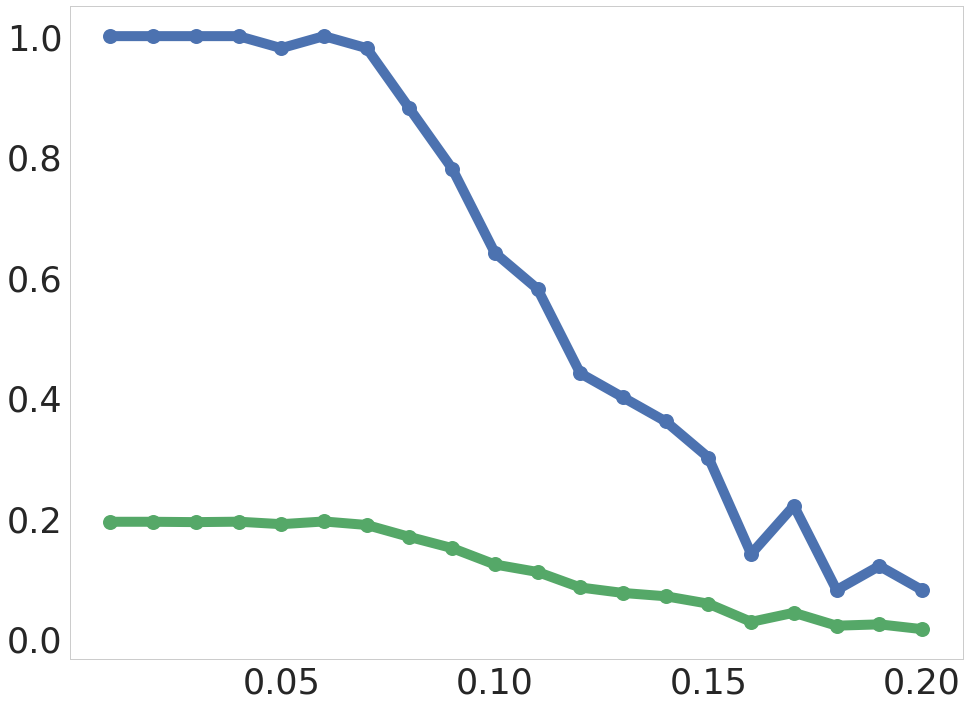

In [111]:
markersize = 15
linewidth = 10

mean = success_vector_scale.mean(axis=1)
persistence_time_vector_scale_mean 

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(scale_vector, mean / 100.0, 'o-', markersize=markersize, linewidth=linewidth, label='success')
ax.plot(scale_vector, persistence_time_vector_scale.mean(axis=1) , 'o-', markersize=markersize, linewidth=linewidth)

In [93]:
scale_vector.shape

(20,)

In [96]:
success_vector_scale.mean(axis=1).shape

(20,)